In [151]:
import pandas as pd

In [152]:
pixels = pd.read_csv("../image_flat/flattened_images.csv")
train_metadata = pd.read_csv("../train/train_metadata.csv")
merged_df = pixels.merge(train_metadata, on='image_path')
hog_pca = pd.read_csv("../train/Features/hog_pca.csv")
color_hist = pd.read_csv("../train/Features/color_histogram.csv")
additional_features = pd.read_csv("../train/Features/additional_features.csv")
digits = pd.read_csv("../dig_feature/ocr_digit_detection.csv")

# Base dataframe
merged_df = pixels.merge(train_metadata, on='image_path')
merged_df = merged_df.merge(digits, on = 'image_path')
merged_df = merged_df.merge(color_hist, on = 'image_path')
merged_df = merged_df.merge(hog_pca, on = 'image_path')
merged_df = merged_df.merge(additional_features, on = 'image_path')
# Merge with feature sets (on image_path)
#merged_df = merged_df.merge(hog_pca, on='image_path')
#merged_df = merged_df.merge(color_hist, on='image_path')
#merged_df = merged_df.merge(additional_features, on='image_path')
#merged_df = merged_df.merge(digits, on='image_path')

test_df = pd.read_csv("../combined_test.csv")
#test_df = test_df.merge(pd.read_csv("../dig_feature/ocr_digit_detection_test.csv"), on='image_path', how ='inner')
test_df = test_df.merge(pd.read_csv("../image_flat/flattened_images_test.csv"), on='image_path', how ='inner')
# display(merged_df)
test_df = pd.read_csv("../image_flat/flattened_images_test.csv")
test_df = test_df.merge(pd.read_csv("../dig_feature/ocr_digit_detection_test.csv"), on='image_path', how ='inner')
test_df = test_df.merge(pd.read_csv("../test/Features/color_histogram.csv"), on='image_path', how ='inner')
test_df = test_df.merge(pd.read_csv("../test/Features/hog_pca.csv"), on='image_path', how ='inner')
test_df = test_df.merge(pd.read_csv("../test/Features/additional_features.csv"), on='image_path', how ='inner')


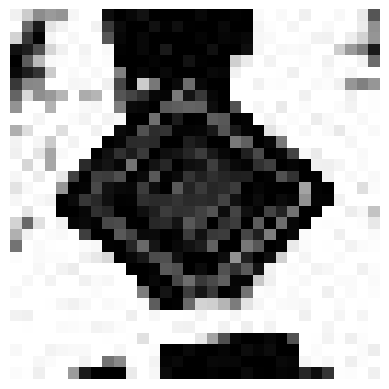

In [ ]:
temp = test_df[:1]
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


pixel_columns = [col for col in temp.columns if col.startswith('pixel_')]


row = temp[pixel_columns].iloc[0].values.astype(np.uint8)
image_array = row.reshape((32, 32))


plt.imshow(image_array, cmap='gray')
plt.axis('off')
plt.show()


image = Image.fromarray(image_array)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


train_df = merged_df.drop(columns=['id'])


features = train_df.columns.difference(['image_path', 'ClassId'])


scaler = StandardScaler()

scaler.fit(train_df[features])

train_df[features] = train_df[features].astype(float)
test_df[features] = test_df[features].astype(float)


train_df.loc[:, features] = scaler.transform(train_df[features])
test_df.loc[:, features] = scaler.transform(test_df[features])


X_train = train_df.drop(['image_path', 'ClassId'], axis=1).values
y_train = train_df['ClassId'].values

X_test = test_df.drop(['image_path'], axis=1).values

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


clf = MLPClassifier(hidden_layer_sizes=(500,), max_iter=300, random_state=42)


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


check = clf.predict(X_train)
accuracy = accuracy_score(y_train, check)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 1.0000


In [156]:
y_pred

array([12, 16, 39, ..., 25, 34, 36], shape=(2353,))

In [157]:
results = pd.read_csv("../test/test_metadata.csv")
predicted = test_df[['image_path']].copy()
predicted['predictions'] = y_pred
results = results.merge(predicted, on='image_path', how='inner')
results['ClassId'] = results['predictions']
results = results.drop(columns = ['predictions', 'image_path'])
display(results)
results.to_csv("results.csv", index=False)

,id,ClassId
0,661,12
1,4477,16
2,1046,39
3,631,5
4,6533,3
...,...,...
2348,2218,31
2349,4952,9
2350,1394,25
2351,3161,34
